# Introduction to Tensorflow and Keras

## By Farzad Minooei

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

## ANN for Regression Problem

### Create Dataset

In [3]:
#Create a synthetic dataset
n =  np.arange(1, 501)
n

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [4]:
np.random.seed(123)
x1 = n ** 0.1 / 10 + np.sin(n / 10) + np.random.randint(low = 1, high = 10, size = 500) + np.random.normal(loc = 0, scale = 0.1, size = 500)
x1

array([ 3.13566311,  3.34694626,  7.36872063,  2.50969191,  4.59481052,
        7.64747499,  2.80062607,  1.82460022,  2.82136404,  1.98641037,
        2.03269128,  4.97174276,  6.0360454 ,  2.15602362,  2.10154154,
        6.20465408,  3.37158518,  9.0803817 ,  4.98315557,  4.08899821,
        5.97856525,  9.02380507,  4.11687168,  5.74750125,  9.72866177,
        1.78652243,  8.51012887,  4.32863234,  5.44285279,  7.2122301 ,
        2.11991353,  5.93636305,  7.10666305,  3.05074404,  1.58049602,
        8.78766463,  3.46074855,  5.64077553,  0.46383074,  2.47290841,
        6.3581306 ,  2.13530339,  4.27143673,  4.43262658,  6.17021803,
        3.08502485,  0.0761719 ,  6.26642237,  4.08833389,  7.03819607,
        6.39786298,  7.45418489,  1.39671935,  5.44054724,  7.51387631,
        2.58680199,  4.43257502,  8.60883974,  1.84499198,  2.98032282,
        1.89571206,  2.17281785,  4.10613969,  6.31041266,  1.21252403,
        9.49841873,  2.62484955,  7.70082384,  4.75766685,  4.72

In [5]:
np.random.seed(123)
x2 = n ** 0.8 / 8 + np.sin(n / 8) + np.random.randint(low = 1, high = 8, size = 500) + np.random.normal(loc = 0, scale = 0.8, size = 500)
x2

array([ 7.56256795,  7.01841119,  7.60097837,  4.29161927,  5.76532542,
        4.91184412,  8.17601319,  3.53802344,  5.56753391,  4.6474212 ,
        5.57254933,  4.62366934, 10.84620167,  5.11633785,  3.35096201,
        2.89366074,  8.03898392,  4.85168968,  1.97835418,  7.17924417,
        3.03411756,  4.4187787 ,  5.86232538,  9.23576086,  7.52345933,
        6.5858608 ,  3.14536667,  2.41837865,  4.99716202,  2.31482958,
        5.46916451,  4.68151939,  6.39120782,  4.85757614,  5.76413535,
        3.05639486,  6.31141564,  1.01315804,  2.81093199,  6.49474763,
        6.31523889,  7.18640409,  5.64359779,  9.53040767,  3.52534897,
        7.28539015,  9.93373258,  9.21075938,  7.10194681,  6.51247142,
        4.92469906,  8.58414581,  3.94414441,  7.23274102,  6.00833262,
        9.43073477,  5.08269881,  7.39646972,  7.90330188,  5.66111077,
        7.78903654, 10.57963707,  9.87628411,  6.75114719,  9.80959656,
        9.78840193,  8.89733693,  8.84838856,  9.85735592, 11.57

In [6]:
np.random.seed(123)
x3 = n ** 0.6 / 6 + np.sin(n / 6) + np.random.randint(low = 1, high = 6, size = 500) + np.random.normal(loc = 0, scale = 0.6, size = 500)
x3

array([ 3.20092866,  5.91076669,  3.70791971,  1.84281647,  5.78263612,
        4.6856823 ,  6.06042868,  4.49758912,  3.32756224,  2.75955809,
        4.54067754,  3.22243645,  2.72343779,  1.88825213,  4.1729216 ,
        5.27929799,  6.01133297,  2.48193102,  2.02896435,  6.20667808,
        3.61119616,  4.80035582,  3.24912423,  4.78029999,  3.19297316,
        3.9334658 ,  1.33635026,  0.92542006,  1.84985733,  2.90311031,
        6.11617566,  5.76115768,  4.66728481,  2.73105221,  4.18754921,
        3.89224458,  3.08429425,  6.70877839,  3.70546468,  5.16651438,
        5.55390933,  3.35141348,  6.40296261,  5.82007054,  6.42925146,
        4.74982921,  5.26250695,  7.5137935 ,  5.81289514,  6.73472879,
        7.89686774,  7.52080343,  6.74361685,  4.39551171,  2.69469056,
        6.97496651,  5.73049837,  3.66700131,  5.86719726,  4.00408728,
        2.54617767,  3.63030581,  6.85874945,  0.89642247,  2.27223288,
        6.21800231,  4.26903404,  2.86152593,  3.56570462,  5.66

In [7]:
np.random.seed(123)
y = (x1 + x2 ** 2 + x3 ** 3) / 3 + np.random.normal(loc = 0, scale = 1.5, size = 500)
y

array([ 29.4130987 ,  87.86617167,  39.13198501,   6.80250527,
        76.19832171,  47.36073529,  93.77333628,  34.46357358,
        25.45350373,  13.56636032,  41.21652517,  19.79532071,
        50.19581216,  10.7301444 ,  27.99893304,  53.25419772,
        98.38326884,  19.2494871 ,   7.25597116,  98.82244311,
        21.86508509,  48.62476679,  22.85761987,  68.52464214,
        31.08041606,  34.38312957,   8.29064361,   1.51355211,
        12.03811069,  11.05344215,  86.55762289,  68.82585417,
        47.21744057,  14.62243149,  37.47012964,  25.43789234,
        24.21600527, 103.90366745,  18.42834062,  61.28002629,
        71.31053478,  27.88272597,  98.95693259,  98.32931981,
        95.29227579,  54.42300421,  85.08687267, 172.38985071,
        85.1155224 , 121.66211197, 172.42663983, 167.28750781,
       110.49163401,  46.36179781,  21.10487417, 145.22356783,
        74.15206374,  40.17446217,  91.0033304 ,  34.67905158,
        25.19817854,  55.17421905, 141.90456269,  15.54

In [8]:
#Create Pandas dataframe
df = pd.DataFrame({'y': y, 'x1': x1, 'x2': x2, 'x3': x3})
df.head()

,y,x1,x2,x3
0,29.413099,3.135663,7.562568,3.200929
1,87.866172,3.346946,7.018411,5.910767
2,39.131985,7.368721,7.600978,3.707920
3,6.802505,2.509692,4.291619,1.842816
4,76.198322,4.594811,5.765325,5.782636


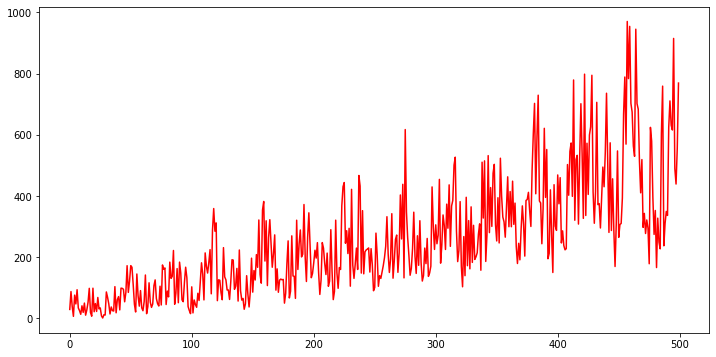

In [9]:
#Plot data
plt.figure(figsize = (12, 6))
plt.plot(y, color = 'red')

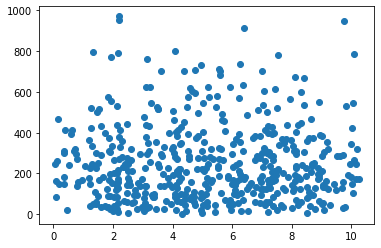

In [10]:
#Simple scatter plot: y vs. x1
plt.scatter(x = df['x1'], y = df['y'])

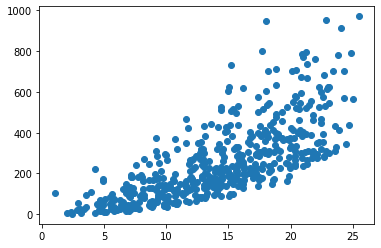

In [11]:
#Simple scatter plot: y vs. x2
plt.scatter(x = df['x2'], y = df['y'])

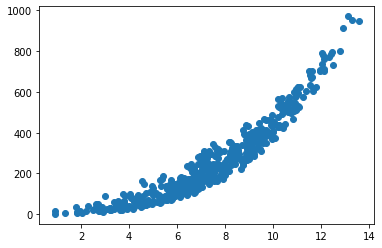

In [12]:
#Simple scatter plot: y vs. x3
plt.scatter(x = df['x3'], y = df['y'])

### Data Preparation

In [13]:
#min-max normalization to scale the data
from sklearn.preprocessing import MinMaxScaler
X_scaled = MinMaxScaler().fit_transform(df.iloc[:, 1: 4].values)
X_scaled = pd.DataFrame(X_scaled, columns = ['x1', 'x2', 'x3'])
X_scaled.head()

,x1,x2,x3
0,0.303094,0.267455,0.181912
1,0.323753,0.245233,0.395819
2,0.716990,0.269023,0.221932
3,0.241889,0.133881,0.074706
4,0.445765,0.194062,0.385705


In [14]:
#Crate Train and Test Dataset
X_train = X_scaled.iloc[0 : 400, :]
y_train = df.iloc[0 : 400, 0]

In [15]:
X_train.head()

,x1,x2,x3
0,0.303094,0.267455,0.181912
1,0.323753,0.245233,0.395819
2,0.716990,0.269023,0.221932
3,0.241889,0.133881,0.074706
4,0.445765,0.194062,0.385705


In [16]:
y_train.head()

0    29.413099
1    87.866172
2    39.131985
3     6.802505
4    76.198322
Name: y, dtype: float64

In [17]:
X_test = X_scaled.iloc[400 : , :]
y_test = df.iloc[400 :, 0]

In [18]:
X_test.head()

,x1,x2,x3
400,0.844067,0.876948,0.687206
401,0.835898,0.788168,0.631858
402,0.549690,0.802054,0.705264
403,0.847259,0.828810,0.447514
404,0.927604,0.884428,0.477647


In [19]:
y_test.head()

400    468.864884
401    374.681839
402    460.048821
403    246.637281
404    286.259482
Name: y, dtype: float64

### Build The Deep Learning Model

In [20]:
#Define the model architecture
model = keras.Sequential()
model.add(keras.layers.Dense(10, input_dim = 3, activation = "relu"))  #Layer 1
model.add(keras.layers.Dense(20, activation = "relu"))                 #Layer 2
model.add(keras.layers.Dense(10, activation = "relu"))                 #Layer 3
model.add(keras.layers.Dense(1))                                       #Output Layer
model.summary() 

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                40        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [21]:
#Configure the model
model.compile(optimizer = 'Adam', loss = 'mean_squared_error', metrics = ['mean_squared_error'])

In [22]:
#Train the model w/ epochs = 100
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
400/400 [==============================] - 0s 414us/sample - loss: 57244.3162 - mean_squared_error: 57244.3164
Epoch 2/100
400/400 [==============================] - 0s 40us/sample - loss: 57202.3817 - mean_squared_error: 57202.3867
Epoch 3/100
400/400 [==============================] - 0s 40us/sample - loss: 57158.6675 - mean_squared_error: 57158.6641
Epoch 4/100
400/400 [==============================] - 0s 80us/sample - loss: 57103.2925 - mean_squared_error: 57103.2969
Epoch 5/100
400/400 [==============================] - 0s 45us/sample - loss: 57028.1127 - mean_squared_error: 57028.1094
Epoch 6/100
400/400 [==============================] - 0s 65us/sample - loss: 56922.3669 - mean_squared_error: 56922.3633
Epoch 7/100
400/400 [==============================] - 0s 45us/sample - loss: 56774.0562 - mean_squared_error: 56774.0586
Epoch 8/100
400/400 [==============================] - 0s 50us/sample - loss: 56578.4541 - mean_squared_error: 56578.4531
Epoch 9/100
400/400 [==

In [23]:
y_train_pred = model.predict(X_train)
y_train_pred = pd.DataFrame(y_train_pred, index = list(range(0, 400)))
y_train_pred

,0
0,117.900772
1,153.516388
2,124.664230
3,72.397842
4,141.508682
...,...
395,281.864014
396,221.379791
397,283.624146
398,254.965347


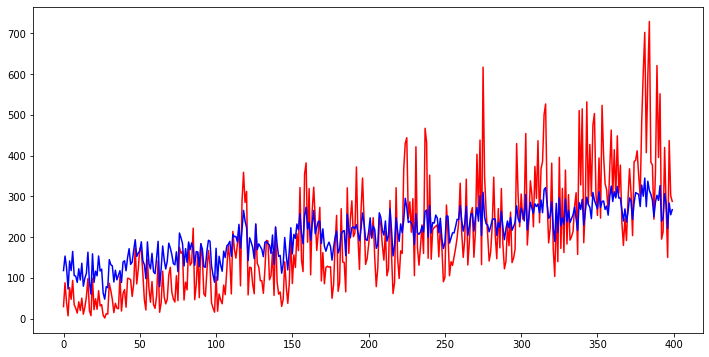

In [24]:
#Plot Actual vs. Prediction
plt.figure(figsize = (12, 6))
plt.plot(y_train, color = 'red') #actual
plt.plot(y_train_pred, color = 'blue') #prediction

In [25]:
#Train the model w/ epochs = 500
#Define the model architecture
model = keras.Sequential()
model.add(keras.layers.Dense(10, input_dim = 3, activation = "relu"))  #Layer 1
model.add(keras.layers.Dense(20, activation = "relu"))                 #Layer 2
model.add(keras.layers.Dense(10, activation = "relu"))                 #Layer 3
model.add(keras.layers.Dense(1))                                       #Output Layer
#Configure the model
model.compile(optimizer = 'Adam', loss = 'mean_squared_error', metrics = ['mean_squared_error'])
#Train the model
model.fit(X_train, y_train, epochs = 500)

Epoch 1/500
400/400 [==============================] - 0s 259us/sample - loss: 57200.2289 - mean_squared_error: 57200.2266
Epoch 2/500
400/400 [==============================] - 0s 42us/sample - loss: 57127.6653 - mean_squared_error: 57127.6719
Epoch 3/500
400/400 [==============================] - 0s 45us/sample - loss: 57038.0867 - mean_squared_error: 57038.0859
Epoch 4/500
400/400 [==============================] - 0s 85us/sample - loss: 56932.9886 - mean_squared_error: 56932.9844
Epoch 5/500
400/400 [==============================] - 0s 47us/sample - loss: 56810.5359 - mean_squared_error: 56810.5352
Epoch 6/500
400/400 [==============================] - 0s 75us/sample - loss: 56659.8459 - mean_squared_error: 56659.8438
Epoch 7/500
400/400 [==============================] - 0s 45us/sample - loss: 56475.4900 - mean_squared_error: 56475.4883
Epoch 8/500
400/400 [==============================] - 0s 70us/sample - loss: 56232.9112 - mean_squared_error: 56232.9141
Epoch 9/500
400/400 [==

In [26]:
#Prediction on train dataset
y_train_pred = model.predict(X_train)
y_train_pred = pd.DataFrame(y_train_pred, index = list(range(0, 400)))
y_train_pred

,0
0,32.506111
1,85.848824
2,43.279114
3,6.263264
4,76.000839
...,...
395,270.057556
396,153.831284
397,451.920410
398,308.223602


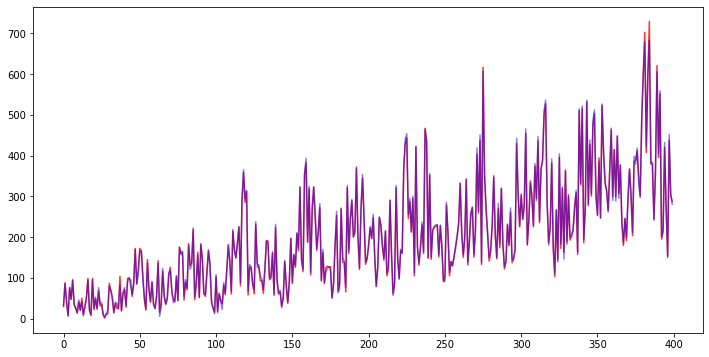

In [27]:
#Plot Actual vs. Prediction
plt.figure(figsize = (12, 6))
plt.plot(y_train, color = 'red', alpha = 0.8)
plt.plot(y_train_pred, color = 'blue', alpha = 0.5)

In [28]:
print(model.evaluate(X_test, y_test))

100/100 [==============================] - 0s 329us/sample - loss: 944.2300 - mean_squared_error: 944.2300
[944.2299926757812, 944.23]


In [29]:
y_test_pred = model.predict(X_test)
y_test_pred = pd.DataFrame(y_test_pred, index = list(range(400, 500)))

In [30]:
y_test_pred

,0
400,468.967407
401,372.128174
402,469.226013
403,247.118347
404,278.265930
...,...
495,816.297729
496,501.798798
497,418.698395
498,558.242310


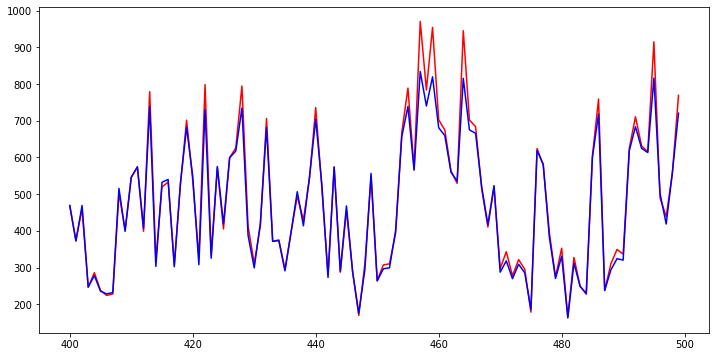

In [31]:
#Plot data
plt.figure(figsize = (12, 6))
plt.plot(y_test, color = 'red')
plt.plot(y_test_pred, color = 'blue')

## ANN for Classification Problem

### Load the MNIST Dataset 

In [ ]:
#Load mnist dataset from Internet
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

In [33]:
path = 'C:/Users/FarzadM/Desktop/mnist.zip'

In [34]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data(path)

In [35]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

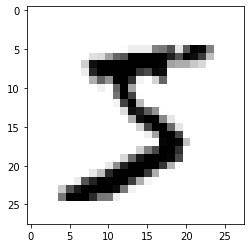

In [36]:
plt.imshow(X_train[0], cmap = plt.cm.binary) 

### Data Preparation 

In [37]:
X_train.shape

(60000, 28, 28)

In [38]:
X_test.shape

(10000, 28, 28)

In [39]:
X_train = X_train.reshape(60000, 28 * 28)

In [40]:
X_train.shape

(60000, 784)

In [41]:
#Scale train dataset
X_train = X_train / 255

In [42]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [43]:
X_test = X_test.reshape(10000, 28 * 28)

In [44]:
X_test.shape

(10000, 784)

In [45]:
#Scale test dataset
X_test = X_test / 255

In [46]:
X_test[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [47]:
y_train[0]

5

In [48]:
y_train.shape

(60000,)

In [49]:
#One-hot encoding
from keras.utils import to_categorical 
y_train = to_categorical(y_train, num_classes = 10)
y_test  = to_categorical(y_test, num_classes = 10) 

In [50]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [51]:
y_train.shape

(60000, 10)

In [52]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [53]:
y_test.shape

(10000, 10)

### Build the Model

In [54]:
#Define the model architecture
model = keras.Sequential()
model.add(keras.layers.Dense(100, input_dim = 28 * 28 , activation = "relu"))       #Layer 1
model.add(keras.layers.Dense(10, activation = "softmax"))                           #Output Layer
model.summary() 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [55]:
#Configure the model
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [56]:
#Train the model
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2700 - acc: 0.9235
Epoch 2/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.1218 - acc: 0.9636
Epoch 3/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0844 - acc: 0.9742
Epoch 4/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0641 - acc: 0.9808
Epoch 5/5
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0500 - acc: 0.9845


In [57]:
#Predict on test dataset
print(model.evaluate(X_test, y_test))

10000/10000 [==============================] - 0s 37us/sample - loss: 0.0882 - acc: 0.9742
[0.08816575130983256, 0.9742]


In [58]:
y_pred = model.predict(X_test)

In [59]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [60]:
y_pred[0]

array([1.6914550e-08, 3.6990954e-08, 1.4761252e-06, 8.9600036e-04,
       1.4829155e-09, 8.3282775e-06, 3.3919499e-12, 9.9908328e-01,
       7.7073167e-07, 1.0089111e-05], dtype=float32)

In [61]:
np.argmax(y_pred[0])

7

In [62]:
len(y_pred)

10000

In [63]:
#Test labels
l = []
for i in range(len(y_test)) : 
 l.append(np.argmax(y_test[i]))

In [64]:
l

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 4,
 4,
 2,


In [65]:
#Prediction labels
pl = []
for i in range(len(y_pred)): 
 pl.append(np.argmax(y_pred[i]))


In [66]:
pl

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 9,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 9,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 4,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 5,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 6,
 4,
 2,


In [67]:
#confusion matrix for test dataset
from sklearn.metrics import confusion_matrix
confusion_matrix(l, pl)

array([[ 968,    1,    0,    2,    0,    5,    2,    0,    2,    0],
       [   0, 1112,    2,    3,    0,    1,    5,    1,   10,    1],
       [   5,    3,  993,    9,    2,    1,    3,    8,    8,    0],
       [   0,    0,    0,  996,    0,    5,    0,    4,    2,    3],
       [   0,    0,    3,    0,  949,    1,    5,    3,    2,   19],
       [   2,    0,    0,   10,    1,  871,    3,    1,    2,    2],
       [   7,    3,    1,    1,    1,    6,  939,    0,    0,    0],
       [   2,    3,    8,    6,    1,    0,    0, 1002,    1,    5],
       [   2,    0,    2,   11,    7,    6,    3,    4,  935,    4],
       [   3,    2,    0,   10,    7,    4,    1,    3,    2,  977]],
      dtype=int64)

# End of the Code